In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [23]:
wine=pd.read_csv('winequality-red.csv',sep=";")

In [25]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [26]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [27]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [28]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [29]:
bins=(2,6.5,8)
group_names=['bad','good']
wine['quality']=pd.cut(wine['quality'],bins=bins,labels=group_names)

In [30]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


In [31]:
label_quality=LabelEncoder()

In [32]:
wine['quality']=label_quality.fit_transform(wine['quality'])

In [33]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [35]:
wine.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

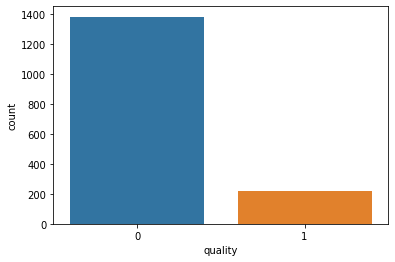

In [36]:
sns.countplot(wine.quality)

In [43]:
X=wine.drop('quality',axis=1)

In [44]:
y=wine['quality']

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

In [46]:
#scaling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [48]:
X_train[:10]

array([[-0.82714279,  0.54981473, -1.30167023, -0.45750895, -0.20771052,
         0.2115121 , -0.4948863 ,  0.17913145,  0.57971542,  0.54164138,
        -0.5836476 ],
       [ 0.25010663, -0.33375749,  1.09055523,  0.25215565, -0.05884466,
         0.11563261,  1.90826336,  0.74933046, -0.12981187, -0.35139659,
        -0.5836476 ],
       [-0.43026142, -0.7755436 ,  0.17438378, -0.17364311, -0.12264432,
         0.69090956,  0.7367279 ,  0.74933046,  1.35374519, -0.05371727,
        -0.67606871],
       [-0.20347207,  0.99160084, -1.40346706,  0.03925627, -0.16517742,
        -0.45964433, -0.37472882,  0.43255324,  0.83772534, -0.76814765,
        -0.86091092],
       [-0.03338006,  0.05280536, -0.18190512,  0.60698795, -0.25024362,
         0.01975312,  1.9683421 ,  0.43255324, -0.25881683, -0.29186073,
        -0.95333203],
       [-0.37356409,  0.77070778, -0.23280354, -0.31557603,  0.00495499,
         0.11563261,  1.48771217, -0.30659363,  0.06369557, -1.06582697,
        -0.860

In [49]:
#random forest

In [78]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
pred=rf.predict(X_test)

In [80]:
pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [81]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       280
           1       0.68      0.38      0.48        40

    accuracy                           0.90       320
   macro avg       0.80      0.68      0.71       320
weighted avg       0.89      0.90      0.89       320



In [82]:
confusion_matrix(y_test,pred)

array([[273,   7],
       [ 25,  15]], dtype=int64)

In [83]:
#svm

In [84]:
clf=svm.SVC()
clf.fit(X_train,y_train)
pred_clf=clf.predict(X_test)

In [85]:
pred_clf[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [86]:
print(classification_report(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       280
           1       0.68      0.33      0.44        40

    accuracy                           0.90       320
   macro avg       0.80      0.65      0.69       320
weighted avg       0.88      0.90      0.88       320



In [87]:
confusion_matrix(y_test,pred_clf)

array([[274,   6],
       [ 27,  13]], dtype=int64)

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
cm=accuracy_score(y_test,pred)
cm

0.9

In [90]:
cm_svm=accuracy_score(y_test,pred_clf)
cm_svm

0.896875